## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Helper functions

In [2]:
def load_data_chunk(filename, chunk_size=1000):
    """ Load a chunk of data from a gzipped TSV file. """
    return pd.read_csv(filename, sep='\t', compression='gzip', chunksize=chunk_size)

def separate_ids_and_data(data):
    ids = data.iloc[:, 0]
    data = data.iloc[:, 1:]
    return ids, data

def plot_line(row):
    # Exclude the first column if it's an identifier
    if isinstance(row.iloc[0], str):
        numeric_row = row.iloc[1:]
    else:
        numeric_row = row

    plt.figure(figsize=(15, 5))
    plt.plot(numeric_row.values)
    plt.title('Gene Expression Profile')
    plt.xlabel('Gene Index')
    plt.ylabel('Expression Level')
    plt.show()

#####################################################################################

def plot_top_genes(row, top_n=50):
    # Exclude non-numeric data if necessary
    numeric_row = row.iloc[1:] if isinstance(row.iloc[0], str) else row

    # Sort the row in descending order and select top N genes
    top_genes = numeric_row.sort_values(ascending=False)[:top_n]

    # Plot
    plt.figure(figsize=(15, 5))
    top_genes.plot(kind='bar')
    plt.title('Top {} Gene Expression Levels'.format(top_n))
    plt.xlabel('Gene')
    plt.ylabel('Expression Level')
    plt.xticks(rotation=45)
    plt.show()

def plot_top_genes_no_text(row, top_n=50):
    # Exclude the first column if it's an identifier
    if isinstance(row.iloc[0], str):
        numeric_row = row.iloc[1:]
    else:
        numeric_row = row

    # Sort the row in descending order and select top N genes
    top_genes = numeric_row.sort_values(ascending=False)[:top_n]

    # Plot
    plt.figure(figsize=(15, 5))
    top_genes.plot(kind='bar')
    plt.title('Top {} Gene Expression Levels'.format(top_n))
    plt.ylabel('Expression Level')
    
    # Disable x-ticks
    plt.xticks([])

    plt.show()

def plot_heatmap(row):
    # Convert row to a numeric type, safely ignoring non-numeric columns
    numeric_row = pd.to_numeric(row, errors='coerce')

    # Drop NaN values which result from coercing non-numeric to numeric
    numeric_row = numeric_row.dropna()

    plt.figure(figsize=(20, 4))
    sns.heatmap([numeric_row.values], annot=False, cmap="viridis")
    plt.title('Gene Expression Heatmap')
    plt.xlabel('Gene Index')
    plt.ylabel('Expression Level')
    plt.show()

## Load data

In [3]:
# Define the file paths
archs4_path = "/dtu-compute/datasets/iso_02456/archs4_gene_expression_norm_transposed.tsv.gz"
gtex_gene_path = "/dtu-compute/datasets/iso_02456/gtex_gene_expression_norm_transposed.tsv.gz"
gtex_isoform_path = "/dtu-compute/datasets/iso_02456/gtex_isoform_expression_norm_transposed.tsv.gz"
gtex_anno_path = "/dtu-compute/datasets/iso_02456/gtex_gene_isoform_annoation.tsv.gz"
gtex_tissue_path = "/dtu-compute/datasets/iso_02456/gtex_annot.tsv.gz"


archs4_chunk = next(load_data_chunk(archs4_path, chunk_size=10))
gtex_gene_chunk = next(load_data_chunk(gtex_gene_path, chunk_size=10))
gtex_isoform_chunk = next(load_data_chunk(gtex_isoform_path, chunk_size=10))
gtex_anno_chunk = next(load_data_chunk(gtex_anno_path, chunk_size=10))
gtex_tissue_chunk = next(load_data_chunk(gtex_tissue_path, chunk_size=10))

In [4]:
gtex_gene_chunk = next(load_data_chunk(gtex_gene_path, chunk_size=10))
gtex_isoform_chunk = next(load_data_chunk(gtex_isoform_path, chunk_size=10))

gene_ids, gene_data = separate_ids_and_data(gtex_gene_chunk)
isoform_ids, isoform_data = separate_ids_and_data(gtex_isoform_chunk)

num_genes = gene_data.shape[1]
num_isoforms = isoform_data.shape[1]

num_genes, num_isoforms

(18965, 156958)

In [5]:
print("gtex_gene_path num rows: 17357")
print("archs4_path num rows: 167885")

gtex_gene_path num rows: 17357
archs4_path num rows: 167885


## Data exploration

In [5]:
chunk = archs4_chunk

print(chunk.shape)
print(chunk.head())
chunk.describe()

(10, 18966)
    sample_id      A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT  \
0  GSM4747249  2.808001  0.146667  1.522200  1.951247  0.000000  0.761953   
1  GSM4063503  2.392233  0.036178  7.570420  0.699714  0.152128  2.384229   
2  GSM4631135  4.288390  0.777380  1.597797  1.297746  0.000000  1.765906   
3  GSM5374404  2.644249  0.092517  0.094436  0.924249  0.000000  0.045038   
4  GSM4891113  4.136538  0.000000  6.873902  0.000000  0.000000  1.854200   

      A4GNT      AAAS      AACS  ...    ZWILCH     ZWINT      ZXDA      ZXDB  \
0  0.000000  2.180121  3.665097  ...  2.573919  1.071359  0.498314  0.000000   
1  0.000000  3.093951  2.633251  ...  1.647097  2.084497  0.074117  0.335072   
2  0.072869  7.404695  5.880534  ...  5.007085  7.096970  1.015069  2.342714   
3  0.033435  6.204663  3.079830  ...  4.087812  6.756117  0.212525  1.424847   
4  0.000000  4.083567  5.713674  ...  2.979250  2.514846  1.253094  1.885699   

       ZXDC    ZYG11A    ZYG11B       ZYX   

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.914253,1.161985,2.736391,0.733740,0.028405,1.467521,0.032041,4.885823,4.532398,0.816950,...,3.810000,4.703844,0.866003,1.793644,2.774589,1.005060,2.289029,6.502139,2.915470,4.316298
std,1.634860,1.656881,2.746807,0.587558,0.060072,1.049281,0.057955,1.499184,1.155333,1.863849,...,1.500157,2.532367,0.586458,1.098272,1.717009,0.992893,0.890759,2.155059,1.270440,1.212484
min,0.281666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.180121,2.633251,0.000000,...,1.528099,1.071359,0.074117,0.000000,0.000000,0.014633,1.089335,0.782139,1.199932,2.207346
25%,2.455237,0.065392,0.736515,0.348123,0.000000,0.619001,0.000000,4.215482,3.673877,0.000000,...,2.675252,2.192084,0.303721,1.270832,1.404825,0.164078,1.570809,6.459385,1.981903,3.962455
50%,2.776604,0.147519,1.559998,0.695602,0.000000,1.810053,0.000000,5.171919,5.074258,0.032164,...,4.447917,5.870054,0.993472,1.776932,2.893821,0.700390,2.331740,6.867337,2.848284,4.481401
75%,4.061326,2.184477,4.221820,0.921204,0.000000,2.268435,0.033175,5.491801,5.296099,0.403799,...,4.988178,6.733668,1.247133,2.588420,4.286638,1.906778,2.680037,7.557019,3.817250,5.022024
max,5.504408,4.484502,7.570420,1.951247,0.152128,2.984220,0.181709,7.404695,5.880534,5.962025,...,5.525404,7.382543,1.873337,3.303075,5.034469,2.538329,3.637858,8.633802,4.833084,5.927927


In [6]:
chunk = gtex_gene_chunk

print(chunk.shape)
print(chunk.head())
chunk.describe()

(10, 18966)
                  sample_id   TMEM38B   SLC24A3    AXDND1      DUXA  ZCCHC13  \
0  GTEX-1117F-0226-SM-5GZZ7  3.327687  2.339137  0.084064  0.000000        0   
1  GTEX-1117F-0426-SM-5EGHI  4.295723  4.206331  0.000000  0.070389        0   
2  GTEX-1117F-0526-SM-5EGHJ  3.860963  2.350497  0.189034  0.000000        0   
3  GTEX-1117F-0626-SM-5N9CS  2.957915  2.935460  0.000000  0.084064        0   
4  GTEX-1117F-0726-SM-5GIEN  2.555816  0.505891  0.056584  0.000000        0   

      FGF18    INPP5D    MAP2K4     BCAR1  ...   MARCH10       EVL    CYP1A2  \
0  0.765535  4.675816  3.768714  5.701826  ...  0.545968  6.146289  0.084064   
1  0.250962  2.765535  3.214125  5.223423  ...  0.378512  4.870365  0.042644   
2  0.871844  4.097611  3.648465  5.529196  ...  0.985500  5.103498  0.028569   
3  2.049631  4.121015  3.705978  5.959538  ...  0.526069  6.604071  0.056584   
4  0.443607  3.841973  2.541019  4.856488  ...  0.321928  6.026800  0.000000   

     ZNF782    LIMCH1     

,TMEM38B,SLC24A3,AXDND1,DUXA,ZCCHC13,FGF18,INPP5D,MAP2K4,BCAR1,LINC00959,...,MARCH10,EVL,CYP1A2,ZNF782,LIMCH1,WDR24,ANGPTL4,UGT2B7,PIPOX,CD1B
count,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,2.961179,2.882207,0.100752,0.015445,0.0,0.667138,3.975789,3.522593,5.334696,1.533665,...,0.341150,6.022050,0.355055,1.533943,3.991446,3.026296,6.118575,0.115505,0.940237,0.0
std,0.685606,1.582597,0.137832,0.032721,0.0,0.553874,0.768029,0.470781,0.703372,0.888326,...,0.306960,0.740483,0.980806,0.569064,0.728256,0.531756,1.705938,0.083752,0.672513,0.0
min,2.056584,0.505891,0.000000,0.000000,0.0,0.150560,2.765535,2.541019,3.992768,0.454176,...,0.000000,4.870365,0.000000,0.669027,2.739848,2.111031,2.931683,0.000000,0.275007,0.0
25%,2.544718,2.263874,0.007142,0.000000,0.0,0.289119,3.564914,3.241436,4.919601,0.803069,...,0.068752,5.737576,0.028569,1.123691,3.584819,2.734519,4.992117,0.066840,0.419175,0.0
50%,2.753829,2.564353,0.070324,0.000000,0.0,0.528569,3.969792,3.677222,5.376309,1.470365,...,0.350220,6.041041,0.035607,1.647112,4.204875,3.123165,5.990838,0.110969,0.814783,0.0
75%,3.235244,3.888613,0.104290,0.000000,0.0,0.845266,4.537116,3.781341,5.722417,2.342490,...,0.489180,6.226922,0.077194,2.025616,4.494117,3.418926,7.740181,0.166618,1.071954,0.0
max,4.295723,5.937815,0.454176,0.084064,0.0,2.049631,5.268285,4.256256,6.481557,2.788686,...,0.985500,7.511041,3.144046,2.201634,4.821200,3.715893,8.234195,0.250962,2.130931,0.0


In [7]:
chunk = gtex_isoform_chunk

print(chunk.shape)
print(chunk.head())
chunk.describe()

(10, 156959)
                  sample_id  ENST00000564396.5  ENST00000473536.1  \
0  GTEX-1117F-0226-SM-5GZZ7           0.000000           0.000000   
1  GTEX-1117F-0426-SM-5EGHI           0.367371           0.815575   
2  GTEX-1117F-0526-SM-5EGHJ           0.555816           0.613532   
3  GTEX-1117F-0626-SM-5N9CS           0.650765           1.589763   
4  GTEX-1117F-0726-SM-5GIEN           0.400538           0.344828   

   ENST00000562759.1  ENST00000616868.1  ENST00000588364.1  ENST00000433525.6  \
0           0.992768           0.000000           0.111031           0.765535   
1           0.226509           0.000000           0.000000           2.906891   
2           0.238787           0.056584           0.823749           1.469886   
3           0.411426           0.000000           2.516015           0.389567   
4           0.389567           0.000000           1.480265           0.613532   

   ENST00000245903.3  ENST00000494254.3  ENST00000540360.5  ...  \
0           1.6229

,ENST00000564396.5,ENST00000473536.1,ENST00000562759.1,ENST00000616868.1,ENST00000588364.1,ENST00000433525.6,ENST00000245903.3,ENST00000494254.3,ENST00000540360.5,ENST00000585498.1,...,ENST00000424358.1,ENST00000540196.5,ENST00000537628.6,ENST00000359972.6,ENST00000364313.1,ENST00000338525.6,ENST00000624592.1,ENST00000064724.7,ENST00000619858.1,ENST00000636657.1
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.556045,0.663741,0.582765,0.005658,1.558458,0.649024,0.525208,0.428220,0.476131,0.257443,...,4.820817,0.049539,0.0,0.022651,0.0,0.116218,2.053341,3.296235,1.851700,0.628488
std,0.417248,0.523342,0.304217,0.017893,0.942802,0.920832,0.679638,0.395732,0.426948,0.229143,...,0.679006,0.114034,0.0,0.071628,0.0,0.192584,0.828311,1.477057,0.632475,0.406903
min,0.000000,0.000000,0.226509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.777157,0.000000,0.0,0.000000,0.0,0.000000,0.422233,0.641546,0.722466,0.000000
25%,0.375663,0.377393,0.395032,0.000000,0.987878,0.000000,0.031082,0.192184,0.194982,0.114083,...,4.423992,0.000000,0.0,0.000000,0.0,0.000000,1.609968,2.110160,1.536689,0.485317
50%,0.603290,0.579750,0.495550,0.000000,1.856958,0.367198,0.207879,0.250503,0.386154,0.195334,...,4.922853,0.000000,0.0,0.000000,0.0,0.000000,2.137265,3.801408,1.957167,0.695746
75%,0.700419,0.863673,0.760336,0.000000,2.229753,0.727534,0.997918,0.659837,0.689252,0.307420,...,5.047384,0.000000,0.0,0.000000,0.0,0.232755,2.428261,4.094083,2.219277,0.805288
max,1.454176,1.589763,1.117695,0.056584,2.528571,2.906891,1.622930,1.111031,1.372952,0.807355,...,5.843984,0.344828,0.0,0.226509,0.0,0.495695,3.282440,5.368070,2.639232,1.310340


In [8]:
chunk = gtex_anno_chunk

print(chunk.shape)
print(chunk.head())
chunk.describe()

(10, 3)
          isoform_id             gene_id gene_name
0  ENST00000373020.8  ENSG00000000003.14    TSPAN6
1  ENST00000494424.1  ENSG00000000003.14    TSPAN6
2  ENST00000496771.5  ENSG00000000003.14    TSPAN6
3  ENST00000612152.4  ENSG00000000003.14    TSPAN6
4  ENST00000614008.4  ENSG00000000003.14    TSPAN6


,isoform_id,gene_id,gene_name
count,10,10,10
unique,10,3,3
top,ENST00000373031.4,ENSG00000000003.14,TSPAN6
freq,1,5,5


In [9]:
chunk = gtex_tissue_chunk

print(chunk.shape)
print(chunk.head())
chunk.describe()

(10, 2)
                  sample_id                    tissue
0  GTEX-1117F-0226-SM-5GZZ7    Adipose - Subcutaneous
1  GTEX-1117F-0426-SM-5EGHI         Muscle - Skeletal
2  GTEX-1117F-0526-SM-5EGHJ           Artery - Tibial
3  GTEX-1117F-0626-SM-5N9CS         Artery - Coronary
4  GTEX-1117F-0726-SM-5GIEN  Heart - Atrial Appendage


,sample_id,tissue
count,10,10
unique,10,10
top,GTEX-1117F-2926-SM-5GZYI,Heart - Atrial Appendage
freq,1,1


## Visualizations


### Genes

**1. Bar Plot of Top N Gene Expressions**  
Since visualizing all 18,000 genes at once would be impractical, you can focus on the top N genes with the highest expression levels in that row.

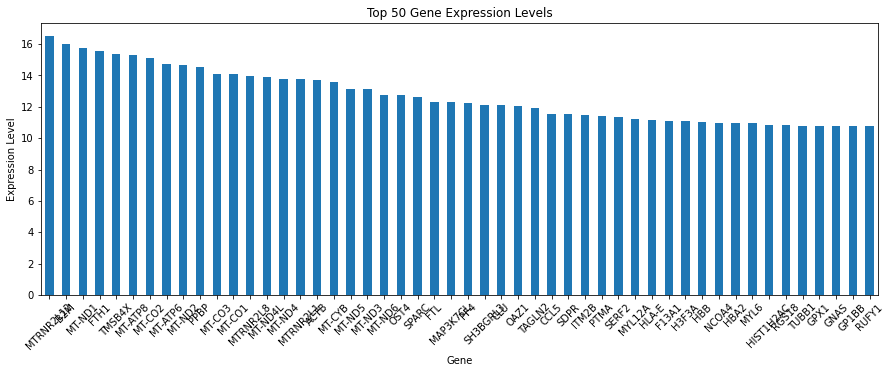

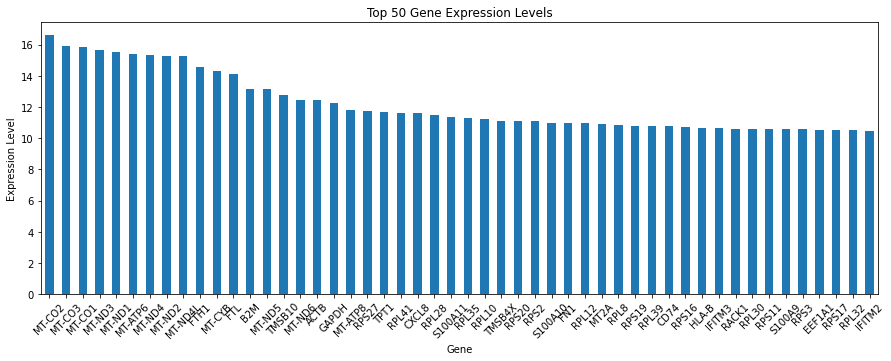

In [23]:
# Example usage
data_chunk = archs4_chunk
plot_top_genes(data_chunk.iloc[0], top_n=50)  # Adjust 'data_chunk' to your DataFrame name and row index as needed
plot_top_genes(data_chunk.iloc[1], top_n=50)  


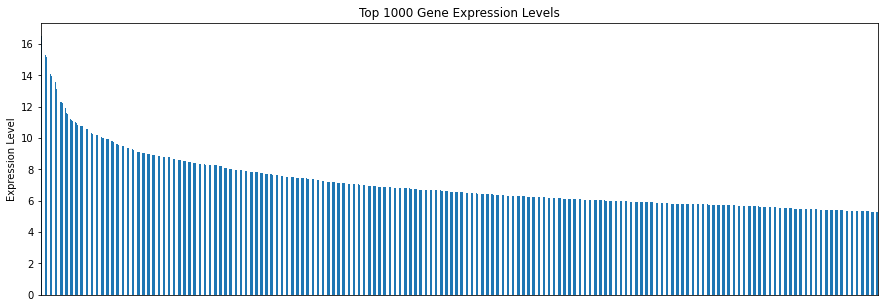

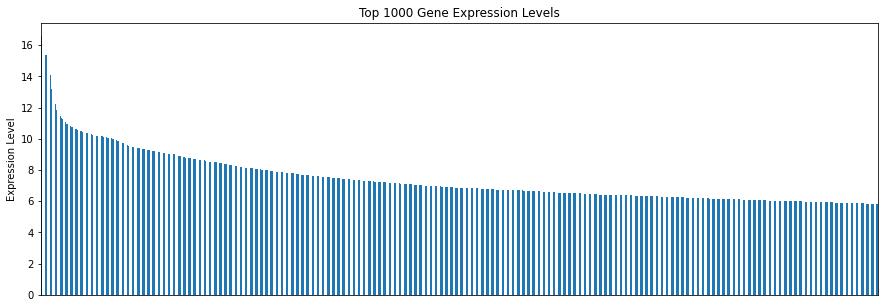

In [33]:
plot_top_genes_no_text(data_chunk.iloc[0], top_n=1000)  
plot_top_genes_no_text(data_chunk.iloc[1], top_n=1000)  

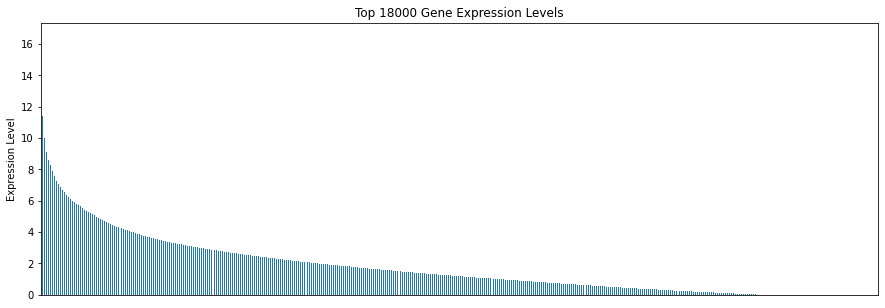

In [32]:
plot_top_genes_no_text(data_chunk.iloc[0], top_n=18000)  

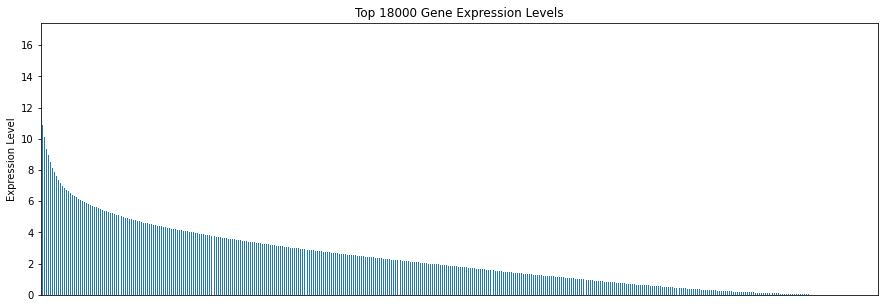

In [34]:
plot_top_genes_no_text(data_chunk.iloc[1], top_n=18000)  

**2. Heatmap**  
A heatmap can be used to visualize the expression levels across all genes, although this may be less effective with very large numbers of genes.

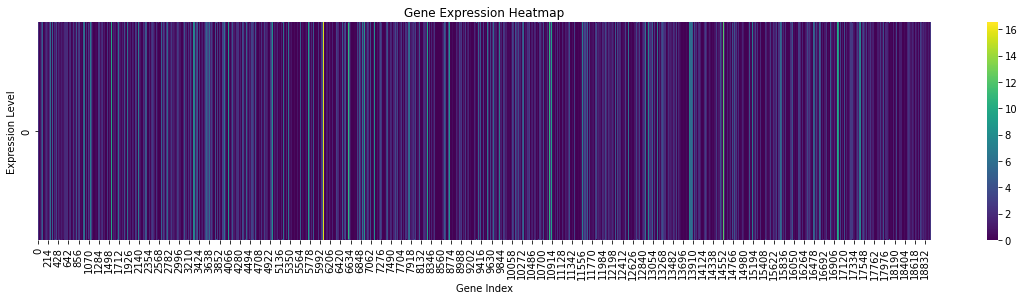

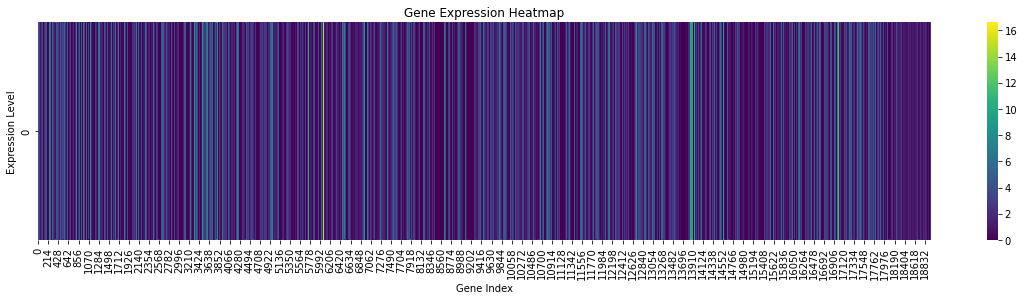

In [22]:
plot_heatmap(data_chunk.iloc[0])  # Replace 'data_chunk' with your DataFrame name
plot_heatmap(data_chunk.iloc[1])  # Replace 'data_chunk' with your DataFrame name


**3. Line Plot**  
For a simpler visualization, we could use a line plot, though interpreting specific genes might be difficult.

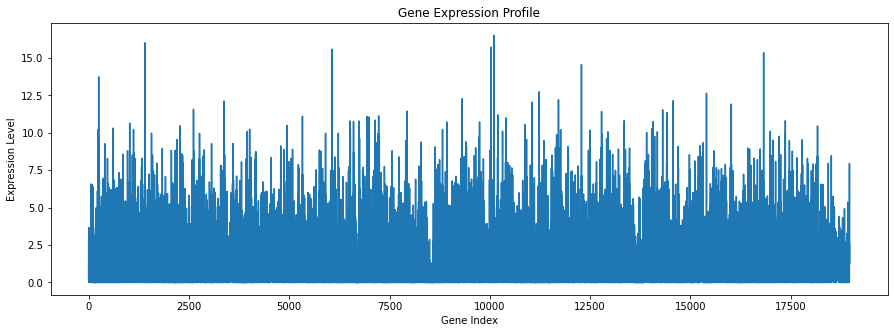

In [14]:
plot_line(data_chunk.iloc[0])

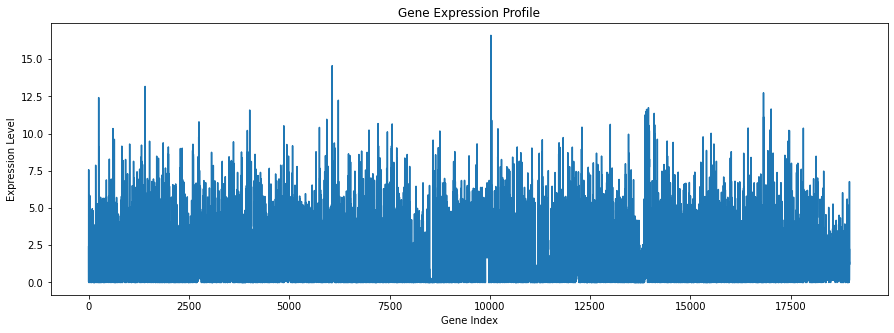

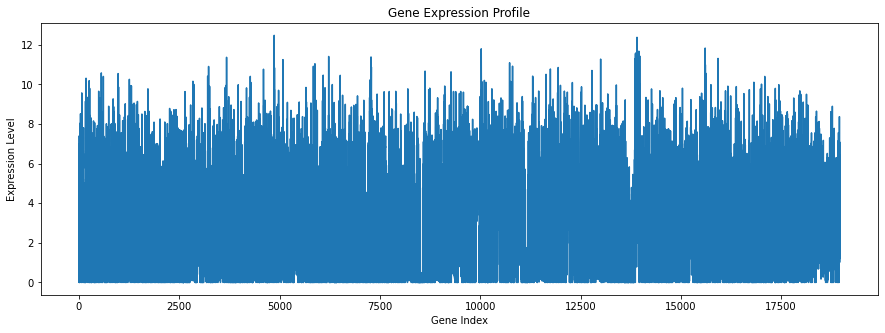

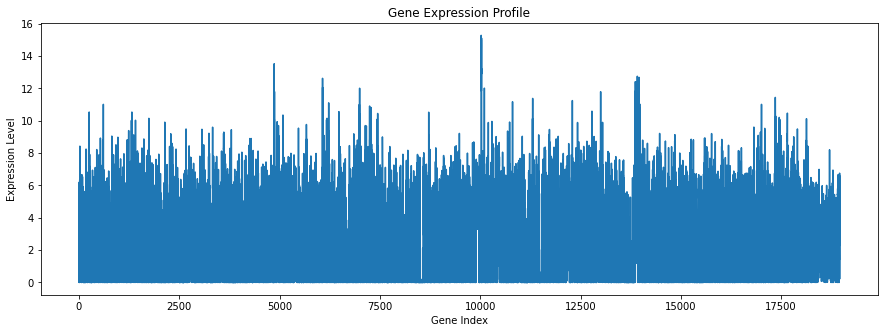

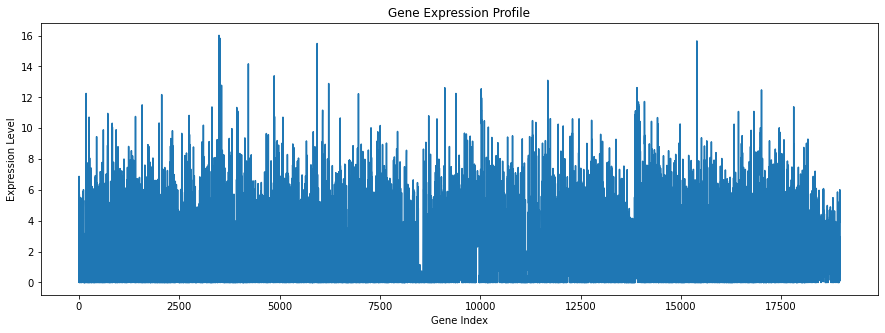

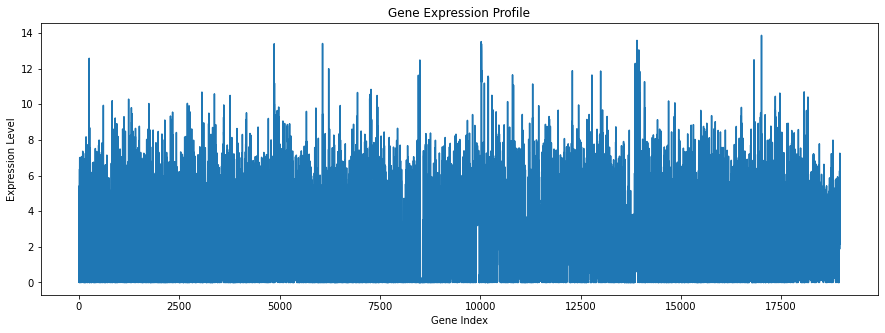

In [17]:
for i in range(1,6):
    plot_line(data_chunk.iloc[i])

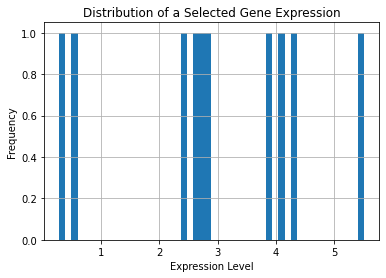

In [25]:
# Histogram for a selected column in archs4_chunk
archs4_chunk.iloc[:, 1].hist(bins=50)
plt.title('Distribution of a Selected Gene Expression')
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.show()

### Isoforms

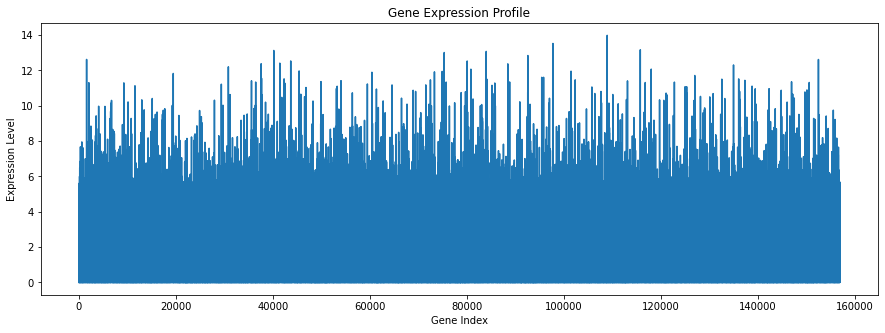

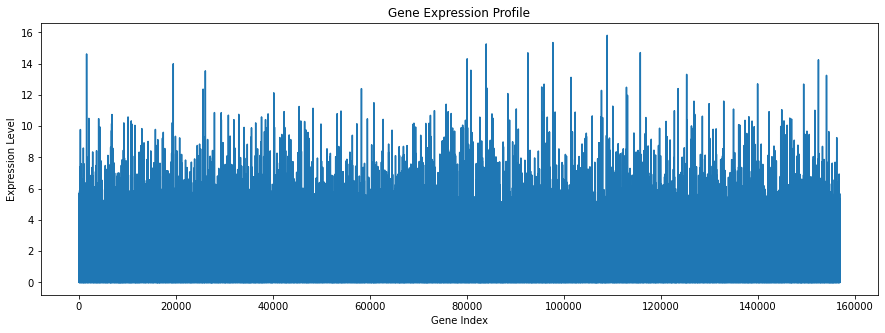

In [19]:
data_chunk = gtex_isoform_chunk
plot_line(data_chunk.iloc[0])
plot_line(data_chunk.iloc[1])

## PCA analysis

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
# Assuming the first column in gtex_gene_chunk is non-numeric data like sample identifiers
features = gtex_gene_chunk.columns[1:]

# Separating out the features (gene expression levels)
x = gtex_gene_chunk.loc[:, features].values

# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)


In [13]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_standardized)

# Creating a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


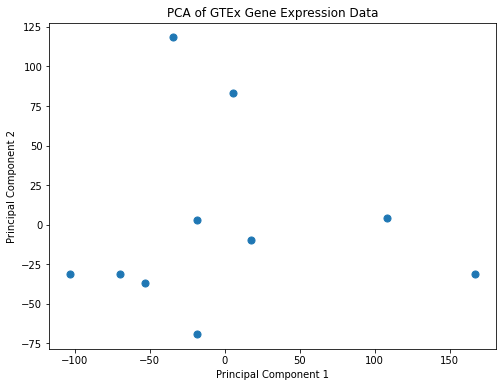

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], s=50)
plt.title('PCA of GTEx Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [15]:
print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2f}")


Explained variance by PC1: 0.33
Explained variance by PC2: 0.16
